In [3]:
import copy
import numpy as np

In [226]:
new_game = np.array([[0, 1, 0, 1, 0, 1, 0, 1],
                     [1, 0, 1, 0, 1, 0, 1, 0],
                     [0, 1, 0, 2, 0, 1, 0, 1],
                     [0, 0, 0, 0, -1, 0, 0, 0],
                     [0, 0, 0, 0, 0, 0, 0, 0],
                     [-1, 0, -1, 0, -1, 0, -1, 0],
                     [0, -1, 0, 0, 0, -1, 0, -1],
                     [-1, 0, -1, 0, -1, 0, -1, 0]])
n = new_game.shape[0]

In [ ]:
def down_pass(i, j):

In [4]:
game = np.array([[0, 0, 0, 1, 0, 2, 0, 1],
                 [0, 0, 0, 0, 1, 0, 1, 0],
                 [0, 1, 0, 2, 0, 1, 0, 1],
                 [0, 0, 0, 0, -1, 0, 0, 0],
                 [0, 0, 0, 0, 0, 0, 0, 0],
                 [-1, 0, 0, 0, -2, 0, -1, 0],
                 [0, -1, 0, 0, 0, 0, 0, -1],
                 [-1, 0, 0, 0, 0, 0, -1, 0]])

In [21]:
import networkx as nx

g = nx.DiGraph()
g.add_edges_from(adjacency)

/opt/conda/lib/python3.7/site-packages/networkx/drawing/layout.py:739: RuntimeWarning: divide by zero encountered in true_divide
  costargs = (np, 1 / (dist_mtx + np.eye(dist_mtx.shape[0]) * 1e-3), meanwt, dim)


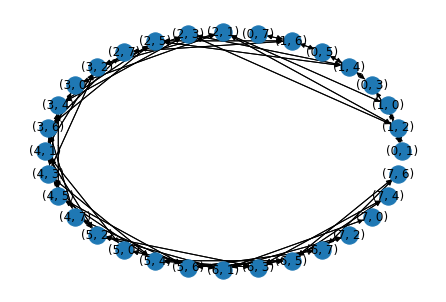

In [69]:
def populate_graph(game):
    attrs, adjacency = {}, []
    for i in range(8):
        for j in range(8):
            if i % 2 == 0:
                if j % 2 == 1:
                    attrs.update({(i, j): {"type": game[i, j]}})
                    if j != 7:
                        adjacency.append(((i, j), (i + 1, j + 1), 1))
                    adjacency.append(((i, j), (i + 1, j - 1), -1))
                    if i != 0:
                        if j != 7:
                            adjacency.append(((i, j), (i - 1, j + 1), 1))
                        adjacency.append(((i, j), (i - 1, j - 1), -1))
            if i % 2 == 1:
                if j % 2 == 0:
                    attrs.update({(i, j): {"type": game[i, j]}})
                    if j != 0:
                        adjacency.append(((i, j), (i - 1, j - 1), -1))
                    adjacency.append(((i, j), (i - 1, j + 1), 1))
                    if i != 7:
                        if j != 0:
                            adjacency.append(((i, j), (i + 1, j - 1), -1))
                        adjacency.append(((i, j), (i + 1, j + 1), 1))
                    
    g = nx.DiGraph()
    g.add_weighted_edges_from(adjacency)
    nx.set_node_attributes(g, attrs)
    # print(g.nodes[(0, 3)]['type'])
    return g

g0 = populate_graph(game)
nx.draw_kamada_kawai(g0, with_labels=True)

In [87]:
def collect_nodes(g0, color):
    nodes = []
    for node in g0.nodes:
        if color == 'b':
            if g0.nodes[node]['type'] > 0:
                nodes.append(node)
        else:
            if g0.nodes[node]['type'] < 0:
                nodes.append(node)
    return nodes

nodes = collect_nodes(g0, 'b')

def non_capturing_step(g0, nodes):
    moves = []
    for node in nodes:
        for neighbor in nx.neighbors(g0, node):
            if g0.nodes[neighbor]['type'] == 0:
                moves.append((node, neighbor))
    return moves

moves = non_capturing_step(g0, nodes)
moves

[((0, 3), (1, 2)),
 ((2, 1), (3, 2)),
 ((2, 1), (3, 0)),
 ((2, 1), (1, 2)),
 ((2, 1), (1, 0)),
 ((2, 3), (3, 2)),
 ((2, 3), (1, 2)),
 ((2, 5), (3, 6)),
 ((2, 7), (3, 6))]

In [ ]:
import math
import networkx as nx
G = nx.Graph()
G.add_edge(1, 2)  # default edge data=1
G.add_edge(2, 3, weight=0.9)  # specify edge data
G.add_edge('y', 'x', function=math.cos)
G.add_node('x')
G.add_node(math.cos)

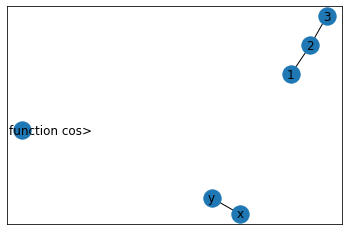

In [ ]:
nx.draw_networkx(G)

In [ ]:
features

[((0, 1), 0),
 ((0, 3), 1),
 ((0, 5), 2),
 ((0, 7), 1),
 ((1, 0), 0),
 ((1, 2), 0),
 ((1, 4), 1),
 ((1, 6), 1),
 ((2, 1), 1),
 ((2, 3), 2),
 ((2, 5), 1),
 ((2, 7), 1),
 ((3, 0), 0),
 ((3, 2), 0),
 ((3, 4), -1),
 ((3, 6), 0),
 ((4, 1), 0),
 ((4, 3), 0),
 ((4, 5), 0),
 ((4, 7), 0),
 ((5, 0), -1),
 ((5, 2), 0),
 ((5, 4), -2),
 ((5, 6), -1),
 ((6, 1), -1),
 ((6, 3), 0),
 ((6, 5), 0),
 ((6, 7), -1),
 ((7, 0), -1),
 ((7, 2), 0),
 ((7, 4), 0),
 ((7, 6), -1)]

In [ ]:
def build_blank_adjacency():
    adjacency = []
    for i in range(8):
        for j in range(8):
            if i % 2 == 0:
                if j % 2 == 1:
                    if j != 7:
                        adjacency.append(((i, j), (i + 1, j + 1)))
                    adjacency.append(((i, j), (i + 1, j - 1)))
                    if i != 0:
                        if j != 7:
                            adjacency.append(((i, j), (i - 1, j + 1)))
                        adjacency.append(((i, j), (i - 1, j - 1)))
            if i % 2 == 1:
                if j % 2 == 0:
                    if j != 0:
                        adjacency.append(((i, j), (i - 1, j - 1)))
                    adjacency.append(((i, j), (i - 1, j + 1)))
                    if i != 7:
                        if j != 0:
                            adjacency.append(((i, j), (i + 1, j - 1)))
                        adjacency.append(((i, j), (i + 1, j + 1)))
    return adjacency

adjacency = build_blank_adjacency()

In [20]:
def populate_graph(game):
    features = list()
    for i in range(8):
        for j in range(8):
            if i

SyntaxError: invalid syntax (952234969.py, line 1)

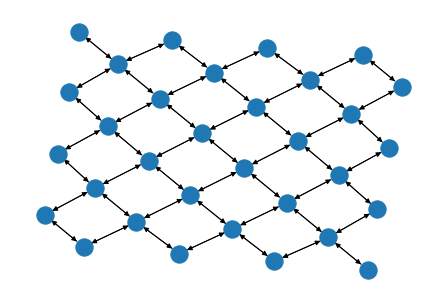

In [19]:
nx.draw_kamada_kawai(g)

In [7]:
adjacency = []
for i in range(8):
    for j in range(8):
        if i % 2 == 0:
            if j % 2 == 1:
                if game[i, j] in [1, -2]:
                    if j != 7:
                        adjacency.append(((i, j), (i + 1, j + 1)))
                    adjacency.append(((i, j), (i + 1, j - 1)))
                if i != 0:
                    if game[i, j] in [2, -1]:
                        if j != 7:
                            adjacency.append(((i, j), (i - 1, j + 1)))
                        adjacency.append(((i, j), (i - 1, j - 1)))
        if i % 2 == 1:
            if j % 2 == 0:
                if game[i, j] in [2, -1]:
                    if j != 0:
                        adjacency.append(((i, j), (i - 1, j - 1)))
                    adjacency.append(((i, j), (i - 1, j + 1)))
                if i != 7:
                    if game[i, j] in [1, -2]:
                        if j != 0:
                            adjacency.append(((i, j), (i + 1, j - 1)))
                        adjacency.append(((i, j), (i + 1, j + 1)))
import pprint
pprint.pprint(adjacency)

[((0, 3), (1, 4)),
 ((0, 3), (1, 2)),
 ((0, 7), (1, 6)),
 ((1, 4), (2, 3)),
 ((1, 4), (2, 5)),
 ((1, 6), (2, 5)),
 ((1, 6), (2, 7)),
 ((2, 1), (3, 2)),
 ((2, 1), (3, 0)),
 ((2, 3), (1, 4)),
 ((2, 3), (1, 2)),
 ((2, 5), (3, 6)),
 ((2, 5), (3, 4)),
 ((2, 7), (3, 6)),
 ((3, 4), (2, 3)),
 ((3, 4), (2, 5)),
 ((5, 0), (4, 1)),
 ((5, 4), (6, 3)),
 ((5, 4), (6, 5)),
 ((5, 6), (4, 5)),
 ((5, 6), (4, 7)),
 ((6, 1), (5, 2)),
 ((6, 1), (5, 0)),
 ((6, 7), (5, 6)),
 ((7, 0), (6, 1)),
 ((7, 6), (6, 5)),
 ((7, 6), (6, 7))]


In [170]:
zeros = np.zeros((2, 2))
one_step_filters = {
    'down_left': np.array([[0, 1],
                           [0, 0]]),
    'down_right': np.array([[1, 0],
                            [0, 0]]),
    'up_left': np.array([[0, 0],
                         [0, -1]]),
    'up_right': np.array([[0, 0],
                          [-1, 0]])
}

In [323]:
def one_step_conv(color, sub_arr, i, j):
    moves = []
    if color == 'b':
        filters = {k: v for k, v in one_step_filters.items() if 'down' in k}
    else:
        filters = {k: v for k, v in one_step_filters.items() if 'up' in k}
        
    for name, filter_ in filters.items():
        is_equal = np.array_equal(sub_arr, filter_)
        if is_equal:
            move = []
            
            if 'left' in name and 'down' in name:
                move.append((i, j + 1))
                move.append((i + 1, j))
                
            if 'left' in name and 'up' in name:
                move.append((i + 1, j + 1))
                move.append((i, j))
                
            if 'right' in name and 'down' in name:
                move.append((i, j))
                move.append((i + 1, j + 1))
                
            if 'right' in name and 'up' in name:
                move.append((i + 1, j))
                move.append((i, j + 1))
                
            moves.append(move)
    return moves

In [324]:
board = [
    '________',
    '__b_____',
    '_w_w____',
    '________',
    '_w______',
    '______b_',
    '_____w__',
    '____w___'
]

In [325]:
def strings_to_array(board):
    arrays = []
    for i, string in enumerate(board):
        chars = [c for c in string]
        
        for i, s in enumerate(chars):
            if s == '_':
                chars[i] = 0
            elif s == 'w':
                chars[i] = -1
            elif s == 'W':
                chars[i] = -2
            elif s == 'b':
                chars[i] = 1
            elif s == 'B':
                chars[i] = 2
        arrays.append(chars)
        
    array = np.stack(arrays)
    return array

In [340]:
def go_down_the_rabbit_hole(color, game, current_move, i, j):
    if i < n - 2 and j < n - 2:
        if not current_move:
            current_move = [(i, j)]
            
        disc_type = game[i, j]
        
        if disc_type >= 1 and color == 'b':
            game[i, j] = 0
            if game[i + 1, j - 1] <= -1 and game[i + 2, j - 2] == 0:
                game[i + 1, j - 1] = 0
                game[i + 2, j - 2] = disc_type
                current_move.append((i + 2, j - 2))
                current_move = go_down_the_rabbit_hole(color, game, copy.deepcopy(current_move), i + 2, j - 2)
            if game[i + 1, j + 1] <= -1 and game[i + 2, j + 2] == 0:
                game[i + 1, j + 1] = 0
                game[i + 2, j + 2] = disc_type
                current_move.append((i + 2, j + 2))
                current_move = go_down_the_rabbit_hole(color, game, copy.deepcopy(current_move), i + 2, j + 2)
                
        elif disc_type <= -1 and color == 'w':
            game[i, j] = 0
            if game[i - 1, j - 1] >= 1 and game[i - 2, j - 2] == 0:
                game[i - 1, j - 1] = 0
                game[i - 2, j - 2] = disc_type
                current_move.append((i - 2, j - 2))
                current_move = go_down_the_rabbit_hole(color, game, copy.deepcopy(current_move), i - 2, j - 2)
            if game[i - 1, j + 1] >= 1 and game[i - 2, j + 2] == 0:
                game[i - 1, j + 1] = 0
                game[i - 2, j + 2] = disc_type
                current_move.append((i - 2, j + 2))
                current_move = go_down_the_rabbit_hole(color, game, copy.deepcopy(current_move), i - 2, j + 2)
                
        if disc_type == 2 and color == 'b':
            game[i, j] = 0
            if game[i - 1, j - 1] <= -1 and game[i - 2, j - 2] == 0:
                game[i - 1, j - 1] = 0
                game[i - 2, j - 2] = disc_type
                current_move.append((i - 2, j - 2))
                current_move = go_down_the_rabbit_hole(color, game, copy.deepcopy(current_move), i - 2, j - 2)
            if game[i - 1, j + 1] <= -1 and game[i - 2, j + 2] == 0:
                game[i - 1, j + 1] = 0
                game[i - 2, j + 2] = disc_type
                current_move.append((i - 2, j + 2))
                current_move = go_down_the_rabbit_hole(color, game, copy.deepcopy(current_move), i - 2, j + 2)
                
        if disc_type == -2 and color == 'w':
            game[i, j] = 0
            if game[i + 1, j - 1] >= 1 and game[i + 2, j - 2] == 0:
                game[i + 1, j - 1] = 0
                game[i + 2, j - 2] = disc_type
                current_move.append((i + 2, j - 2))
                current_move = go_down_the_rabbit_hole.append(color, game, copy.deepcopy(current_move), i + 2, j - 2)
            if game[i + 1, j + 1] >= 1 and game[i + 2, j + 2] == 0:
                game[i + 1, j + 1] = 0
                game[i + 2, j + 2] = disc_type
                current_move.append((i + 2, j + 2))
                current_move = go_down_the_rabbit_hole.append(color, game, copy.deepcopy(current_move), i + 2, j + 2)
                
    if len(current_move) <= 1:
        return []
    
    return current_move

In [341]:
def allowed_moves(board, color):
    game = strings_to_array(board)
    original_game = copy.deepcopy(game)
    moves = []
    for i in range(0, n - 1):
        for j in range(0, n - 1):
            game = copy.deepcopy(original_game)
            arr = game[i:i + 2, j:j + 2]
            arr = np.where(arr == 2, 1, arr)
            arr = np.where(arr == -2, -1, arr)
            moves.extend(one_step_conv(color, arr, i, j))
            
            arr = go_down_the_rabbit_hole(color, game, [], i, j)
            if arr:
                moves.append(arr)
            game = copy.deepcopy(original_game)
            
    remove_non_capturing = False
    for move in moves:
        if len(move) > 2:
            remove_non_capturing = True
            break
    if remove_non_capturing:
        moves = [m for m in moves if len(m) > 2]
    return moves

In [342]:
allowed_moves(board, color='b')

[[(1, 2), (3, 0), (5, 2), (3, 4)]]

In [328]:
board = [
            '________',
            '__b_____',
            '_w_w____',
            '________',
            '_w______',
            '_____b__',
            '____w___',
            '___w____'
        ]